In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

from astropy import units as u
from astropy import constants as c
from astropy.coordinates import SkyCoord
from astropy.analytic_functions import blackbody_lambda, blackbody_nu

In [2]:
mpl.rc('figure', figsize=(12, 8))
mpl.rc('lines', linewidth=4)
mpl.rc('font', size=20)
mpl.rc('axes.formatter', limits=(-4, 4))

In [3]:
def texify(unit):
    unit_strings = []
    for unit, power in zip(intensity_unit.bases, intensity_unit.powers):
        if power == 1:
            unit_strings.append(unit.to_string())
        else:
            unit_strings.append(unit.to_string() + "$^{{{:d}}}$".format(power))
    return " ".join(unit_strings)

# Astropy quantities

Astropy quantitites are a great way to handle all sorts of messy unit conversions.  Careful unit conversions save lives!  [https://en.wikipedia.org/wiki/Gimli_Glider](https://en.wikipedia.org/wiki/Gimli_Glider)

The simplest way to create a new quantity object is multiply or divide a number by a `Unit` instance.

In [4]:
print(type(u.Msun))
u.Msun

<class 'astropy.units.core.Unit'>


Unit("solMass")

A brief word of warning, the pretty printing shown above will take longer than just printing out the values of an array.  This is unnoticable in this case, but is evident if you try to print a large array of quantities.

In [5]:
mass = 1 * u.Msun
print(type(mass))
mass

<class 'astropy.units.quantity.Quantity'>


<Quantity 1.0 solMass>

In [6]:
# quantities subclass numpy ndarray, so you can make handle arrays of quantities like you would
# any other array object
mass.__class__.__bases__

(numpy.ndarray,)

In [7]:
# we can convert units to other equivalent units
mass.to(u.kg)

<Quantity 1.9891e+30 kg>

In [8]:
# there are shortcuts for converting to the relevent system, regardless of what type of quantity it is
mass.cgs

<Quantity 1.9891000000000003e+33 g>

In [9]:
mass.si

<Quantity 1.9891e+30 kg>

In [10]:
# we can inspect their unit and their numeric value with that unit
print(mass.value, mass.unit)

1.0 solMass


In [11]:
# calculations with quantities can produce quantities with new units
average_density = mass / (4 / 3 * np.pi * u.Rearth ** 3)
average_density.cgs

<Quantity 1830149.9819262004 g / cm3>

# Constants

Physical constants are found in the `astropy.constants` module, and work just like units.

In [12]:
# Newton's constant
c.G

<Constant name='Gravitational constant' value=6.67384e-11 uncertainty=8e-15 unit='m3 / (kg s2)' reference='CODATA 2010'>

In [13]:
# Planck's constant
c.h

<Constant name='Planck constant' value=6.62606957e-34 uncertainty=2.9e-41 unit='J s' reference='CODATA 2010'>

In [14]:
# speed of light
c.c

<Constant name='Speed of light in vacuum' value=299792458.0 uncertainty=0.0 unit='m / s' reference='CODATA 2010'>

# Calculations with quantity arrays

[  1.15532160e-05   1.11086939e-05   1.07118259e-05   1.03546641e-05
   1.00310006e-05   9.73590635e-06   9.46541158e-06   9.21627809e-06
   8.98583467e-06   8.77185553e-06   8.57246913e-06   8.38608884e-06
   8.21135949e-06   8.04711571e-06   7.89234904e-06   7.74618178e-06
   7.60784597e-06   7.47666638e-06   7.35204655e-06   7.23345738e-06
   7.12042765e-06   7.01253614e-06   6.90940499e-06   6.81069414e-06
   6.71609657e-06   6.62533433e-06   6.53815508e-06   6.45432912e-06
   6.37364683e-06   6.29591652e-06   6.22096246e-06   6.14862323e-06
   6.07875024e-06   6.01120648e-06   5.94586534e-06   5.88260965e-06
   5.82133080e-06   5.76192791e-06   5.70430718e-06   5.64838125e-06
   5.59406863e-06   5.54129322e-06   5.48998384e-06   5.44007386e-06
   5.39150080e-06   5.34420602e-06   5.29813442e-06   5.25323417e-06
   5.20945645e-06   5.16675527e-06] m(3/2) solMass(1/2) / (earthRad(1/2) kg(1/2) s)
[ 6451.85077635  6203.60902807  5981.97958137  5782.52390238  5601.77519058
  5436.98091

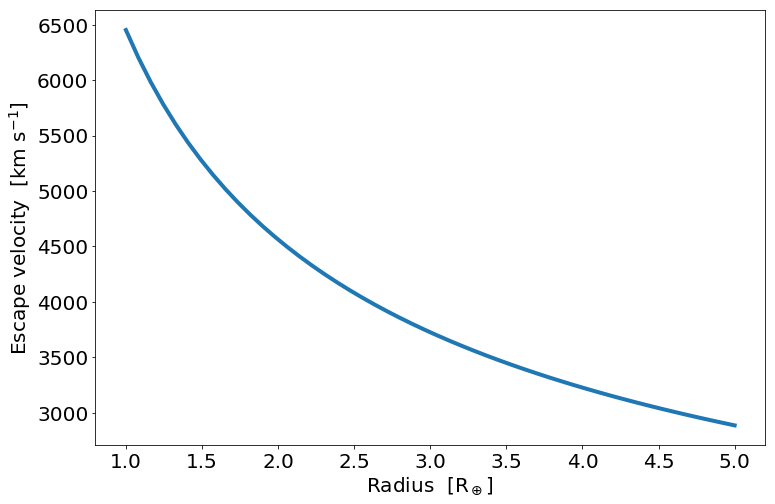

In [15]:
# made into a quantity array by multiplying numeric array by unit
R = np.linspace(1, 5) * u.Rearth
v = np.sqrt(2 * c.G * u.Msun / R)
print(v)
v = v.to(u.km / u.s)
print(v)
plt.plot(R, v)
plt.xlabel(r"Radius  [R$_\oplus$]")
plt.ylabel(r"Escape velocity  [km s$^{-1}$]")

# Quantities as sanity checks

In [16]:
obscure_quantity = 42 * c.G * c.m_e ** 2 / c.k_B ** 2 * c.c ** 3 * (5700 * u.K) ** -2 * u.Msun / u.Mpc

In [17]:
obscure_quantity

<Quantity 1.0119264660752778e-05 kg m6 solMass / (J2 Mpc s5)>

In [18]:
# what the heck is a m^6 kg Msun / (Mpc J^2 s^5)??
obscure_quantity.decompose()

<Quantity 652.3114876808578 m / s>

In [19]:
# will fail!
obscure_quantity.to(u.m)

UnitConversionError: 'kg m6 solMass / (J2 Mpc s5)' (speed) and 'm' (length) are not convertible

In [20]:
# addition works for like units
(1 * u.m) + (1 * u.cm)

<Quantity 1.01 m>

In [21]:
# and fails for the wrong dimensions
(1 * u.m) + (1 * u.s)

UnitConversionError: Can only apply 'add' function to quantities with compatible dimensions

# Unit equivalencies
Equivalencies allow you to do unit conversions under certain physical assumptions.  For instance, it makes sense to talk about converting wavelength to frequency when you are discussing the properties of light waves in a vacuum.  See [http://docs.astropy.org/en/stable/units/equivalencies.html#unit-equivalencies](http://docs.astropy.org/en/stable/units/equivalencies.html#unit-equivalencies).

## Spectral equivalence

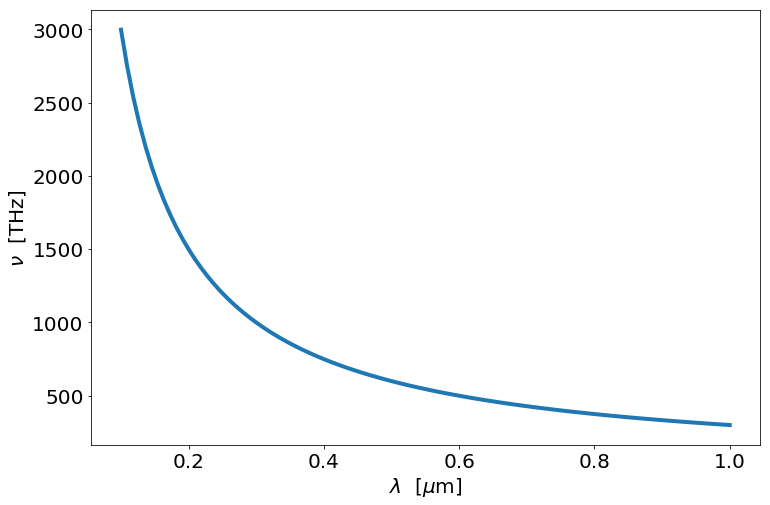

In [22]:
wavelengths = np.linspace(0.1, 1, 100) * u.micron

# will fail without the correct equivalency passed in!
frequencies = wavelengths.to(u.THz, equivalencies=u.spectral()) 

plt.plot(wavelengths, frequencies)
plt.xlabel(r"$\lambda$  [$\mu$m]")
plt.ylabel(r"$\nu$  [THz]")

## Spectral energy density equivalencies

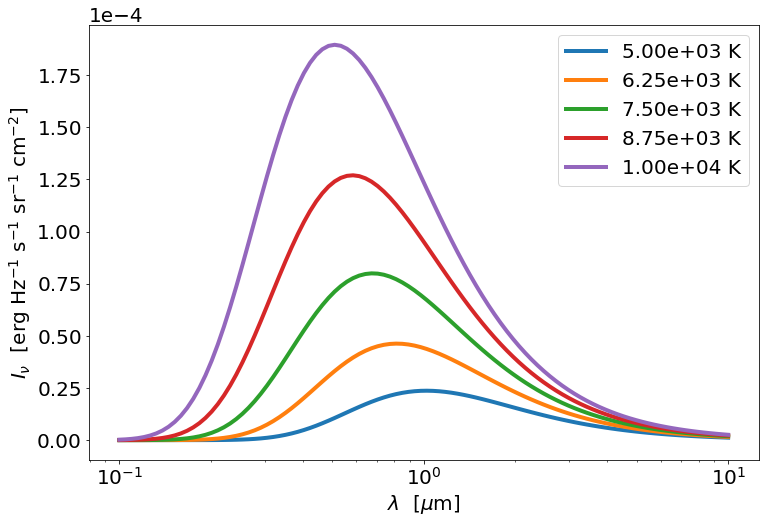

In [23]:
intensity_unit = blackbody_nu(wavelengths[0], temperature=1e3 * u.K).unit
wavelengths = np.logspace(-1, 1, 100) * u.micron 
temperatures = np.linspace(5e3, 1e4, 5) * u.K

for T in temperatures:
    plt.plot(wavelengths, blackbody_nu(wavelengths, temperature=T), 
             label='{:.2e}'.format(T))
    
plt.xscale('log')
plt.legend(loc='best')
plt.xlabel(r'$\lambda$  [$\mu$m]')
plt.ylabel('$I_\\nu$  [{}]'.format(texify(intensity_unit)))

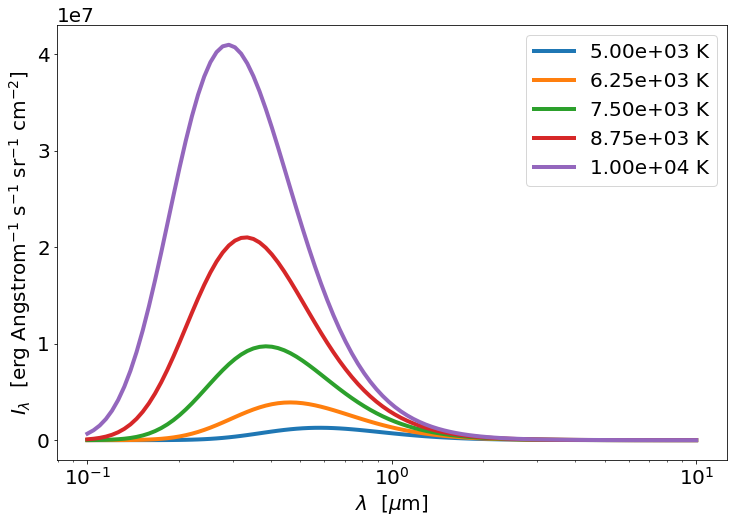

In [24]:
intensity_unit = blackbody_lambda(wavelengths[0], temperature=1e3 * u.K).unit
for T in temperatures:
    plt.plot(wavelengths, blackbody_lambda(wavelengths, temperature=T), 
             label='{:.2e}'.format(T))
    
plt.xscale('log')
plt.legend(loc='best')
plt.xlabel(r'$\lambda$  [$\mu$m]')
plt.ylabel('$I_\\lambda$  [{}]'.format(texify(intensity_unit)))

In [25]:
T = 1e4 * u.K
solid_angle = ((1 * u.arcsec) ** 2).to(u.sr)
f_nu = blackbody_nu(wavelengths, temperature=T) * solid_angle
f_lambda = blackbody_lambda(wavelengths, temperature=T) * solid_angle

print(f_nu.unit)
print(f_lambda.unit)

# I_nu.to(I_lambda.unit) # would fail

# for conversion of spectral energy density, we need to specify what part of the spectra we're looking at
f_lambda_converted = f_nu.to(f_lambda.unit, equivalencies=u.spectral_density(wavelengths))

print(f_lambda_converted.unit)

# shouldn't raise any exceptions!
assert np.all(np.isclose(f_lambda.value, f_lambda_converted.value))

erg / (cm2 Hz s)
erg / (Angstrom cm2 s)
erg / (Angstrom cm2 s)


## Other cool equivalencies
Doppler shifts (for both radio velocities and optical velocities), dimensionless angles, parallax.

# Words of warning

Quantity arrays will often break functions that aren't prepared for them.  Simple numpy operations still work, but for more complicated routines you'll have to convert to the units you want and then take the underlying array with the `quantity.value` attribute.

In [26]:
# e.g., from the example above
np.isclose(f_lambda, f_lambda_converted)

UnitsError: Can only apply 'add' function to dimensionless quantities when other argument is not a quantity (unless the latter is all zero/infinity/nan)

Even when you think you have a dimensionless array, it can still be a dimensionless quantity.

In [27]:
print((1 * u.m) / (2 * u.m), type((1 * u.m) / (2 * u.m)))

0.5 <class 'astropy.units.quantity.Quantity'>


# Using units in your own code

You can use the decorator `quality_input` as a clean way of ensuring your functions get the proper input.

In [29]:
@u.quantity_input(angle=u.arcsec, distance=u.Mpc)
def angle_to_size(angle, distance):
    return angle.to(u.radian).value * distance

# this should work
angle_to_size(1 * u.arcsec, 25 * u.Mpc).to(u.kpc)

<Quantity 0.121203420277384 kpc>

In [30]:
# quantity_input only checks for convertability, not that it's the same unit
angle_to_size(1 * u.arcmin, 25 * u.Mpc).to(u.kpc)

<Quantity 7.27220521664304 kpc>

In [31]:
# this should raise an error
angle_to_size(1 * u.m, 25 * u.Mpc)

UnitsError: Argument 'angle' to function 'angle_to_size' must be in units convertible to 'arcsec'.

# SkyCoord

The `SkyCoord` class, from `astropy.coordinates`, is a convenient way of dealing with astronomical coordinate systems.

[http://docs.astropy.org/en/stable/coordinates/index.html](http://docs.astropy.org/en/stable/coordinates/index.html)

In [32]:
coord = SkyCoord(45, 30, unit=u.deg)

In [33]:
# ICRS is the reference frame
coord

<SkyCoord (ICRS): (ra, dec) in deg
    ( 45.,  30.)>

In [34]:
# we can transform between coordinate frames
coord.fk4

<SkyCoord (FK4: equinox=B1950.000, obstime=B1950.000): (ra, dec) in deg
    ( 44.24694135,  29.80187815)>

In [35]:
coord.fk5

<SkyCoord (FK5: equinox=J2000.000): (ra, dec) in deg
    ( 45.00000965,  29.99999788)>

In [36]:
coord.galactic

<SkyCoord (Galactic): (l, b) in deg
    ( 153.52136545, -25.12784127)>

In [37]:
# latitude and longitude are accessed with ra and dec (when in icrs or fk frames)
coord.ra

<Longitude 45.0 deg>

In [38]:
coord.dec

<Latitude 30.0 deg>

The attributes `ra` and `dec` are `Angle`s.  They are subclasses of `Quantity`, and so they behave similarly, but have more specific functionality.  See [http://docs.astropy.org/en/stable/coordinates/angles.html#working-with-angles](http://docs.astropy.org/en/stable/coordinates/angles.html#working-with-angles) for more details.

You can get nice string representations of angles for all your inane legacy software requirements.

In [40]:
print(coord.to_string())
print(coord.to_string('dms'))
print(coord.to_string('hmsdms'))
print(coord.to_string('hmsdms', sep=':'))
print(coord.to_string('hmsdms', sep=' '))

45 30
45d00m00s 30d00m00s
03h00m00s +30d00m00s
03:00:00 +30:00:00
03 00 00 +30 00 00


# Matching coordinates

There are lots of specific use cases outlined [here](http://docs.astropy.org/en/stable/coordinates/index.html#using-astropy-coordinates), but let's go over a simple catalog matching exercise.

In [41]:
# need network connection
center_coord = SkyCoord.from_name('M31')
center_coord

<SkyCoord (ICRS): (ra, dec) in deg
    ( 10.6847929,  41.269065)>

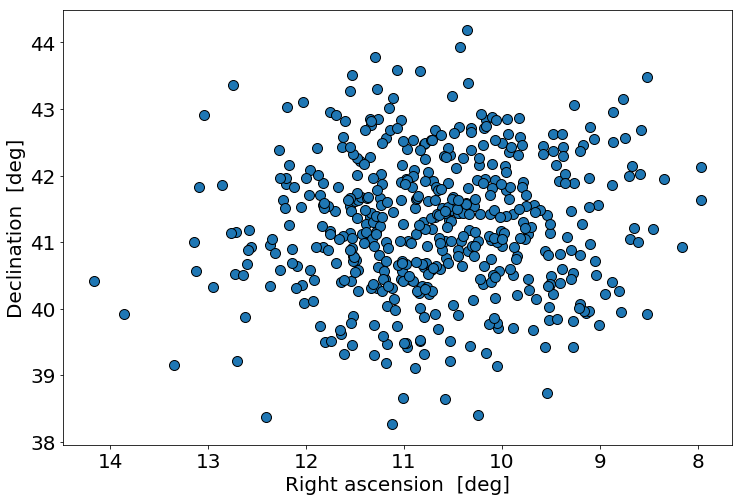

In [42]:
# some mock coordinates
n = 500
ra_values = np.random.randn(n) + center_coord.ra.deg
dec_values = np.random.randn(n) + center_coord.dec.deg
coords = SkyCoord(ra_values, dec_values, unit=u.deg)

plt.scatter(coords.ra.deg, coords.dec.deg, s=100, 
            edgecolor='k', label='Parent sample')
plt.xlim(plt.xlim()[::-1]) # ra increases right to left
plt.xlabel("Right ascension  [deg]")
plt.ylabel("Declination  [deg]")

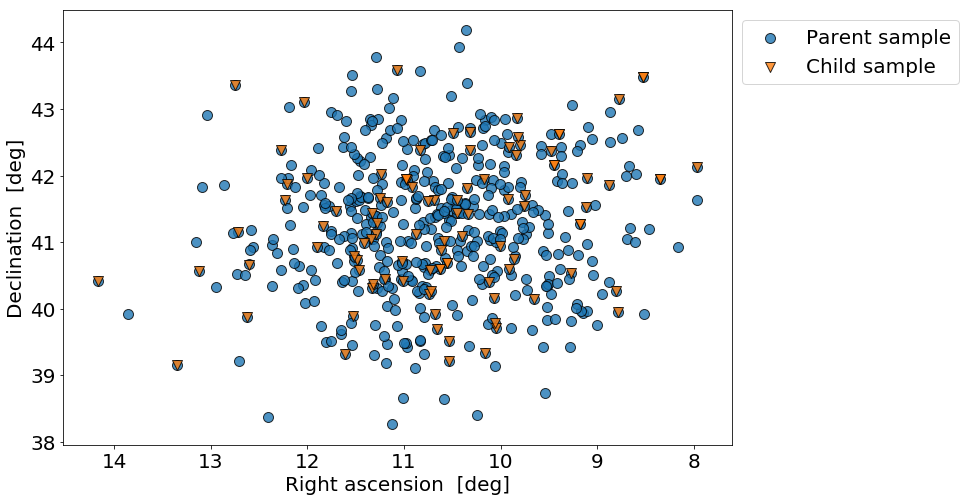

In [43]:
# mock measurements
n_sample = 100
astrometric_noise = 1 * u.arcsec

sample_indices = np.random.choice(np.arange(len(coords)), n_sample)
sample_ra = coords[sample_indices].ra.deg
sample_dec = coords[sample_indices].dec.deg

angles = 2 * np.pi * np.random.rand(n_sample)
dr = astrometric_noise.to(u.deg).value * np.random.randn(n_sample)
dx = np.cos(angles) * dr - np.sin(angles) * dr
dy = np.sin(angles) * dr + np.cos(angles) * dr
sample_coords = SkyCoord(sample_ra + dx, sample_dec + dy, unit=u.deg)

plt.scatter(coords.ra.deg, coords.dec.deg, s=100, 
            edgecolor='k', marker='o', alpha=0.8, label='Parent sample')
plt.scatter(sample_coords.ra.deg, sample_coords.dec.deg, s=100, 
            edgecolor='k', marker='v', alpha=0.8, label='Child sample')
plt.xlim(plt.xlim()[::-1]) # ra increases right to left
plt.xlabel("Right ascension  [deg]")
plt.ylabel("Declination  [deg]")
plt.legend(bbox_to_anchor=(1, 1))

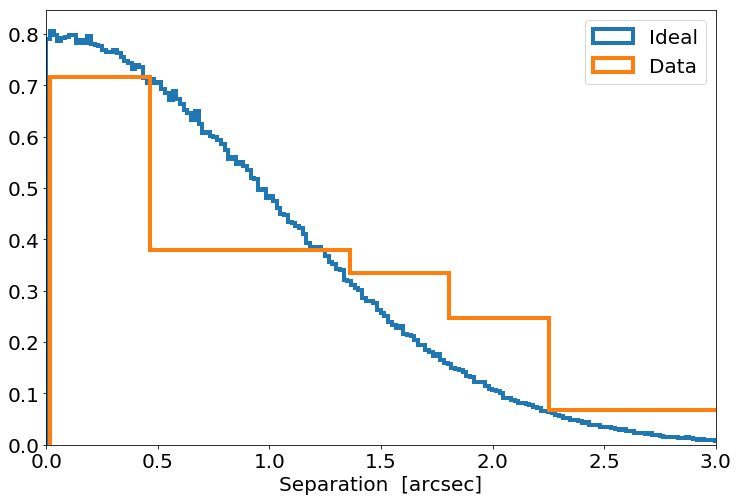

In [47]:
# match_to_catalog_sky will return indices into coords of the closest matching objects,
# the angular separation, and the physical distance (ignored here)
idx, sep, dist = sample_coords.match_to_catalog_sky(coords)

ideal_sep = astrometric_noise.to(u.deg) * np.random.randn(int(1e6))
plt.hist(np.abs(ideal_sep.to(u.arcsec)), histtype='step', lw=4, bins='auto', normed=True, label='Ideal')
plt.hist(sep.arcsec, histtype='step', lw=4, bins='auto', normed=True, label='Data')
plt.xlim(0, 3)
plt.xlabel("Separation  [arcsec]")
plt.legend(loc='best')

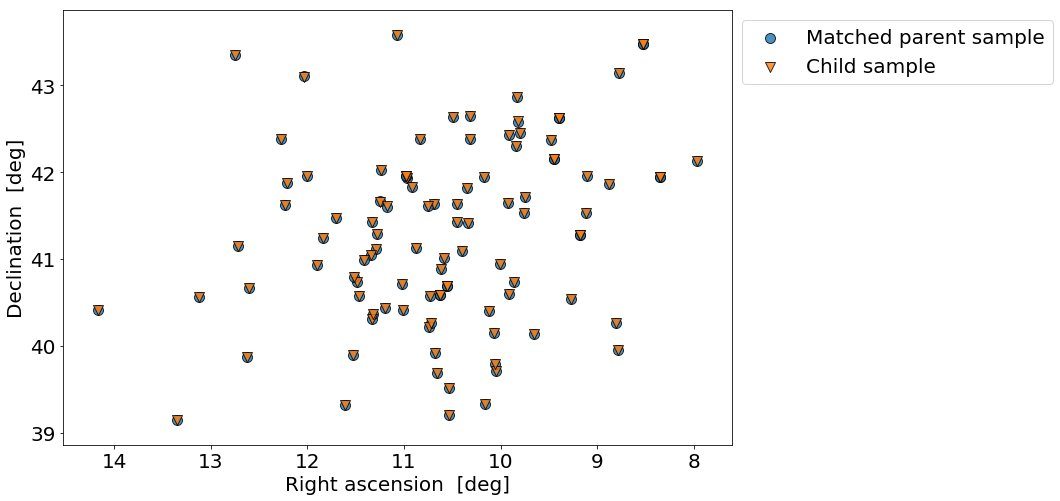

In [46]:
plt.scatter(coords[idx].ra.deg, coords[idx].dec.deg, s=100, 
            edgecolor='k', marker='o', alpha=0.8, label='Matched parent sample')
plt.scatter(sample_coords.ra.deg, sample_coords.dec.deg, s=100, 
            edgecolor='k', marker='v', alpha=0.8, label='Child sample')
plt.xlim(plt.xlim()[::-1]) # ra increases right to left
plt.xlabel("Right ascension  [deg]")
plt.ylabel("Declination  [deg]")
plt.legend(bbox_to_anchor=(1, 1))